# MACHINE LEARNING PROJECT

## Fotoğraflardaki El Yazısı Rakamları Otomatik Tanıma ve Anlamlandırma

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784', parser='auto')

In [2]:
mnist.data.shape


(70000, 784)

In [3]:
def showimage(dframe, index):    
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

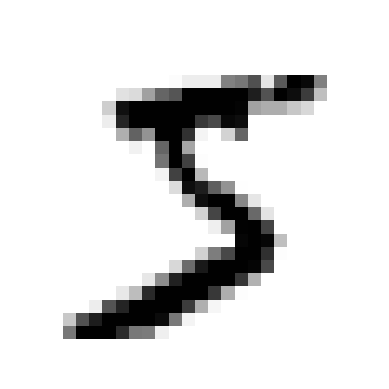

In [4]:
showimage(mnist.data, 0)

70,000 image dosyası, her bir image için 784 boyut(784 feature) mevcut.

### Split Data -> Training Set ve Test Set

In [5]:

# test ve train oranı 1/7 ve 6/7
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [6]:
type(train_img)

pandas.core.frame.DataFrame

In [7]:
test_img_copy = test_img.copy()

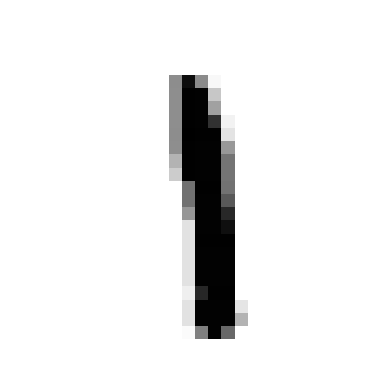

In [8]:
showimage(test_img_copy, 2)

In [9]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [10]:
pca = PCA(.95)

In [11]:
pca.fit(train_img)

PCA(n_components=0.95)

In [12]:
print(pca.n_components_)

327


In [13]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [14]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=10000)

In [15]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

#### Modelimiz eğitildi şimdi el yazısı rakamları makine öğrenmesi ile tanıma işlemini gerçekletirelim:

In [16]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

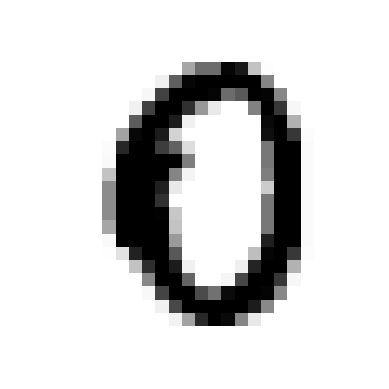

In [17]:
showimage(test_img_copy, 0)

In [18]:
logisticRegr.predict(test_img[1].reshape(1,-1))

array(['4'], dtype=object)

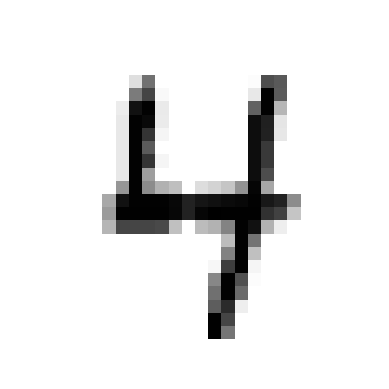

In [19]:
showimage(test_img_copy, 1)

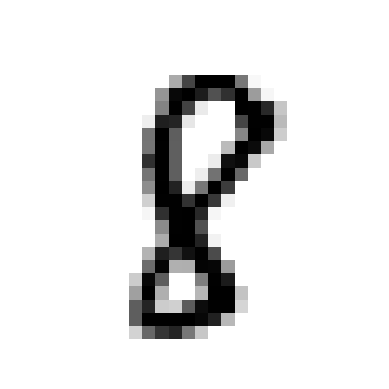

In [20]:
showimage(test_img_copy, 9900)

In [21]:
logisticRegr.predict(test_img[9900].reshape(1,-1))

array(['8'], dtype=object)

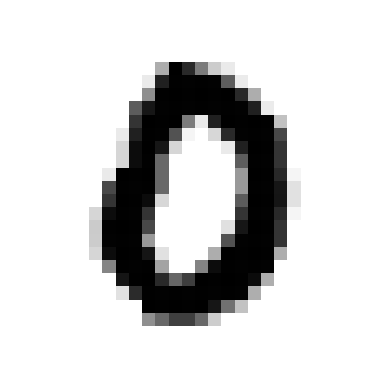

In [22]:
showimage(test_img_copy, 9999)

In [23]:
logisticRegr.predict(test_img[9999].reshape(1,-1))

array(['0'], dtype=object)

In [24]:
logisticRegr.score(test_img, test_lbl)

0.9184